In [1]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model("my_model_weights_resnet50_trainable_tt.h5")

In [ ]:
model = load_model("model.json")

In [21]:
model = load_model('my_model3conlayer.h5')

In [3]:
import tensorflow as tf

In [5]:
print(tf.__version__)

2.1.0


In [3]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1000)              25636712  
_________________________________________________________________
dense_12 (Dense)             (None, 512)               512512    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 1026      
Total params: 26,412,906
Trainable params: 2,829,290
Non-trainable params: 23,583,616
__________________________________

In [5]:
from tensorflow.keras.utils import plot_model

In [28]:
!pip3 install pydot_ng

Defaulting to user installation because normal site-packages is not writeable


In [7]:
#import pydot
import graphviz
import pydot_ng as pydot

In [9]:
print(pydot.find__graphviz())

AttributeError: module 'pydot_ng' has no attribute 'find__graphviz'

In [13]:

from tensorflow.keras.utils import plot_model

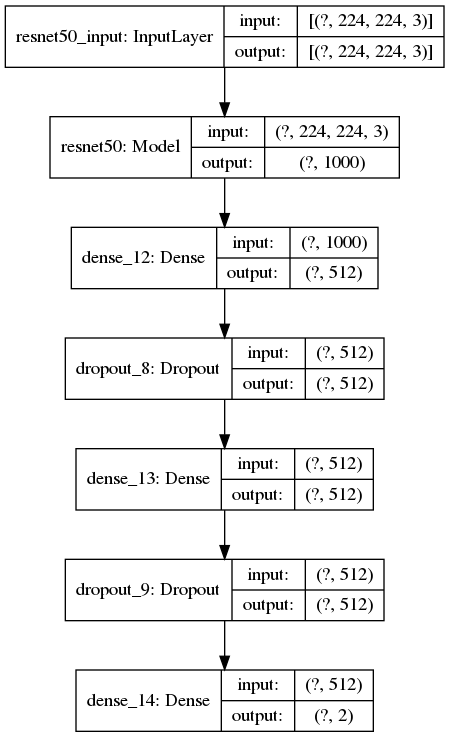

In [15]:
plot_model(model,to_file="model_file1.png",show_shapes = True,show_layer_names = True)

In [6]:
import cv2
#img = cv2.imread("pothole-detection-dataset/potholes/1.jpg")

In [7]:
import numpy as np
import glob

In [8]:
img = cv2.resize(img,(224,224))

NameError: name 'img' is not defined

In [ ]:
img = np.expand_dims(img,axis =0)

In [26]:
model.predict(img)

array([[1.]], dtype=float32)

In [9]:
 def import_images(path):
    images = []
    for img in glob.glob(path):
        n = cv2.imread(img)
        images.append(n)
    return images

In [24]:
import os
import cv2
import numpy as np
data_path = 'pothole-detection-dataset'
data_dir_list = os.listdir(data_path)

img_rows=256
img_cols=256
num_channel=1

num_epoch=10

img_data_list=[]

count = []
c =0
for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(64,64))
        img_data_list.append(input_img_resize)
        c +=1
    count.append(c)
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
#img_data = img_data/255
img_data.shape

Loaded the images of dataset-norma

Loaded the images of dataset-potholes



(678, 64, 64, 3)

In [25]:
num_classes = 2

num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[:count[0]]=0
for i in range(num_classes-1):
  labels[count[i]:count[i+1]] = i+1

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(img_data,labels,test_size = 0.25,random_state = 42)

In [29]:
from tensorflow.keras.utils import to_categorical

In [32]:
y_train = to_categorical(y_train)

In [34]:
metrics = model.evaluate(X_train, y_train)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

508/508 [==============================] - 0s 199us/sample - loss: 0.2623 - accuracy: 0.9291
loss: 0.2623204006923465
accuracy: 0.9291338324546814


In [ ]:
model.fit()

In [11]:
X_normal = x_normal
X_potholes = x_potholes

In [12]:
 def pothole_resize(x_potholes,y,z):
    x_pothole__resized = []
    for i in range(len(x_potholes)):
        x = cv2.resize(x_potholes[i],(y,z))
        x_pothole__resized.append(x)
    return x_pothole__resized

In [16]:
x_pot = pothole_resize(x_potholes,64,64)
x_nor = pothole_resize(x_normal,64,64)
label = np.zeros(len(x_nor))
x = x_nor
for i in x_pot:
    x.append(i)
x = np.array(x)
label1 = np.ones(len(x_pot))
labels = np.concatenate((label,label1),axis = 0)
print(labels.shape)

(678,)


In [26]:
print("THE number of pothole images are "+str(len(x_pot)))
print("the number of normal images are",str(len(x_nor)))

THE number of pothole images are 329
the number of normal images are 678


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,labels,test_size = 0.25,random_state = 42)


NameError: name 'x' is not defined

In [23]:
# to evaluate
metrics = model.evaluate(X_test, y_test)
for metric_i in range(len(model.metrics_names)):
    metric_name = model.metrics_names[metric_i]
    metric_value = metrics[metric_i]
    print('{}: {}'.format(metric_name, metric_value))

ValueError: A target array with shape (170, 2) was passed for an output of shape (None, 1) while using as loss `binary_crossentropy`. This loss expects targets to have the same shape as the output.

In [28]:
import numpy as np

In [33]:
weight=[]
for layer in model.layers:
    weights = layer.get_weights()
    weight.append(weights)

In [41]:
len(weight[1][0])

2048

In [35]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

In [42]:
import numpy
#import ga

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""
weight=[]
for layer in model.layers:
    weights = layer.get_weights()
    weight.append(weights)
# Inputs of the equation.
equation_inputs = weight[3]

# Number of the weights we are looking to optimize.
num_weights = 262656 

"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""
sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

num_generations = 5
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness, 
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])


[[ 2.49526037  2.027205    2.58050272 ... -0.23101533  2.47618578
   3.14697685]
 [-2.67249452  1.05373072 -0.0953465  ...  2.19034721  2.51407135
   0.72993662]
 [-1.13836304  2.80147258  3.12701681 ... -3.44436031 -1.81968335
  -0.15232202]
 ...
 [-0.30469798 -1.16096507  2.17122395 ... -2.42867164 -3.93842113
   1.58239981]
 [ 2.36029217  0.36480054  3.85138373 ...  0.65860271 -1.01492684
   0.7614511 ]
 [-2.73784864 -3.4172881  -1.89638498 ... -1.79438436  3.56705697
  -0.69797424]]
Generation :  0


ValueError: could not broadcast input array from shape (512,512) into shape (512)